In [28]:
pip install wordcloud


  Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl.metadata (3.5 kB)
Using cached wordcloud-1.9.3-cp311-cp311-win_amd64.whl (300 kB)


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import glob
import re
import nltk
import spacy
import string
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize
from deep_translator import GoogleTranslator
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

In [4]:
folder_path = r"C:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\dataset sentimen"
all_files = glob.glob(folder_path + "/*.csv") + glob.glob(folder_path + "/*.CSV")

df_merged = pd.concat((pd.read_csv(f) for f in all_files), ignore_index=True)

df_merged.to_csv(folder_path + "/brics.csv", index=False)

In [5]:
df_merged

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1850576274789724530,Sun Oct 27 16:32:20 +0000 2024,4420,Mengapa Banyak Negara ingin bergabung dengan B...,1850576274789724530,https://pbs.twimg.com/media/Ga6MVzIaIAAfsl7.png,NaN,in,Indonesia,29,32,717,https://x.com/TxtdariHI/status/185057627478972...,1292806214955307010,TxtdariHI
1,1849709620518146488,Fri Oct 25 07:08:34 +0000 2024,79,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,1849709620518146488,https://pbs.twimg.com/media/Gat9GPMa8AA6p4M.jpg,NaN,in,Indonesia,2,4,18,https://x.com/destsoe/status/1849709620518146488,323641768,destsoe
2,1849793985000374527,Fri Oct 25 12:43:48 +0000 2024,9522,Kalo pada akhirnya Indonesia join BRICS good m...,1849793985000374527,NaN,NaN,in,Indonesia,441,442,648,https://x.com/TxtdariHI/status/184979398500037...,1292806214955307010,TxtdariHI
3,1849695127196799061,Fri Oct 25 06:10:58 +0000 2024,24770,JUST IN: 🇮🇩 Indonesia officially begins proces...,1849695127196799061,https://pbs.twimg.com/media/Gatv6hcW0AA_qzr.jpg,NaN,en,BRICS,654,634,4230,https://x.com/BRICSinfo/status/184969512719679...,1449140157903482882,BRICSinfo
4,1821422973858783445,Thu Aug 08 05:47:32 +0000 2024,12779,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,1821422973858783445,https://pbs.twimg.com/media/GUb-iZ-XgAEnrgK.jpg,NaN,en,BRICS,93,175,2001,https://x.com/BRICSinfo/status/182142297385878...,1449140157903482882,BRICSinfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,1741854937653383287,Mon Jan 01 16:12:33 +0000 2024,189,🇷🇺MFA: A pivotal moment in the development of ...,1741854937653383287,NaN,NaN,en,London,5,108,49,https://x.com/RussianEmbassy/status/1741854937...,114718372,RussianEmbassy
3364,1742173259704021096,Tue Jan 02 13:17:27 +0000 2024,252,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,1742173259704021096,https://pbs.twimg.com/media/GC1xWD_W4AAyWBA.jpg,NaN,fr,EU,1,19,28,https://x.com/benjimk/status/1742173259704021096,245478639,benjimk
3365,1741915286029140472,Mon Jan 01 20:24:27 +0000 2024,215,@ConflictTR Merak edenler için BRICS Brezilya ...,1741918330552750419,NaN,ConflictTR,tr,Türkiye,0,3,1,https://x.com/os1mheen/status/1741918330552750419,1115227831,os1mheen
3366,1742010424449798308,Tue Jan 02 02:30:24 +0000 2024,255,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,1742010424449798308,NaN,NaN,en,India,2,7,38,https://x.com/satyagodara/status/1742010424449...,128212909,satyagodara


In [24]:
data = pd.read_csv("dataset sentimen/brics.csv")
data

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1850576274789724530,Sun Oct 27 16:32:20 +0000 2024,4420,Mengapa Banyak Negara ingin bergabung dengan B...,1850576274789724530,https://pbs.twimg.com/media/Ga6MVzIaIAAfsl7.png,NaN,in,Indonesia,29,32,717,https://x.com/TxtdariHI/status/185057627478972...,1292806214955307010,TxtdariHI
1,1849709620518146488,Fri Oct 25 07:08:34 +0000 2024,79,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,1849709620518146488,https://pbs.twimg.com/media/Gat9GPMa8AA6p4M.jpg,NaN,in,Indonesia,2,4,18,https://x.com/destsoe/status/1849709620518146488,323641768,destsoe
2,1849793985000374527,Fri Oct 25 12:43:48 +0000 2024,9522,Kalo pada akhirnya Indonesia join BRICS good m...,1849793985000374527,NaN,NaN,in,Indonesia,441,442,648,https://x.com/TxtdariHI/status/184979398500037...,1292806214955307010,TxtdariHI
3,1849695127196799061,Fri Oct 25 06:10:58 +0000 2024,24770,JUST IN: 🇮🇩 Indonesia officially begins proces...,1849695127196799061,https://pbs.twimg.com/media/Gatv6hcW0AA_qzr.jpg,NaN,en,BRICS,654,634,4230,https://x.com/BRICSinfo/status/184969512719679...,1449140157903482882,BRICSinfo
4,1821422973858783445,Thu Aug 08 05:47:32 +0000 2024,12779,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,1821422973858783445,https://pbs.twimg.com/media/GUb-iZ-XgAEnrgK.jpg,NaN,en,BRICS,93,175,2001,https://x.com/BRICSinfo/status/182142297385878...,1449140157903482882,BRICSinfo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363,1741854937653383287,Mon Jan 01 16:12:33 +0000 2024,189,🇷🇺MFA: A pivotal moment in the development of ...,1741854937653383287,NaN,NaN,en,London,5,108,49,https://x.com/RussianEmbassy/status/1741854937...,114718372,RussianEmbassy
3364,1742173259704021096,Tue Jan 02 13:17:27 +0000 2024,252,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,1742173259704021096,https://pbs.twimg.com/media/GC1xWD_W4AAyWBA.jpg,NaN,fr,EU,1,19,28,https://x.com/benjimk/status/1742173259704021096,245478639,benjimk
3365,1741915286029140472,Mon Jan 01 20:24:27 +0000 2024,215,@ConflictTR Merak edenler için BRICS Brezilya ...,1741918330552750419,NaN,ConflictTR,tr,Türkiye,0,3,1,https://x.com/os1mheen/status/1741918330552750419,1115227831,os1mheen
3366,1742010424449798308,Tue Jan 02 02:30:24 +0000 2024,255,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,1742010424449798308,NaN,NaN,en,India,2,7,38,https://x.com/satyagodara/status/1742010424449...,128212909,satyagodara


In [25]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3368 entries, 0 to 3367
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   conversation_id_str      3368 non-null   int64 
 1   created_at               3368 non-null   object
 2   favorite_count           3368 non-null   int64 
 3   full_text                3368 non-null   object
 4   id_str                   3368 non-null   int64 
 5   image_url                1660 non-null   object
 6   in_reply_to_screen_name  366 non-null    object
 7   lang                     3368 non-null   object
 8   location                 2480 non-null   object
 9   quote_count              3368 non-null   int64 
 10  reply_count              3368 non-null   int64 
 11  retweet_count            3368 non-null   int64 
 12  tweet_url                3368 non-null   object
 13  user_id_str              3368 non-null   int64 
 14  username                 3368 non-null  

In [26]:
columns_drop = ['conversation_id_str', 'favorite_count', 'id_str', 'image_url', 'in_reply_to_screen_name', 'lang', 'location', 'quote_count', 'reply_count', 'retweet_count', 'tweet_url', 'user_id_str']

data = data.drop(columns = columns_drop)

data


,created_at,full_text,username
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo
...,...,...,...
3363,Mon Jan 01 16:12:33 +0000 2024,🇷🇺MFA: A pivotal moment in the development of ...,RussianEmbassy
3364,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk
3365,Mon Jan 01 20:24:27 +0000 2024,@ConflictTR Merak edenler için BRICS Brezilya ...,os1mheen
3366,Tue Jan 02 02:30:24 +0000 2024,BREAKING: The UAE Saudi Arabia Ethiopia Egypt ...,satyagodara


# Data Cleaning

In [27]:
data.duplicated().sum()

np.int64(1934)

In [28]:
data = data.drop_duplicates()

In [29]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1434 entries, 0 to 1682
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   created_at  1434 non-null   object
 1   full_text   1434 non-null   object
 2   username    1434 non-null   object
dtypes: object(3)
memory usage: 44.8+ KB


In [33]:
# remove punctuation
def clean_text(text):
    # Menghapus tautan
    text = re.sub(r'http[s]?://\S+', '', text)
    # Menghapus kalimat yang sama dengan tautan yang dihapus
    text = re.sub(r'\b\w+\b(?:\s+\b\w+\b)*\s*http[s]?://\S+', '', text)
    # Menghapus tanda baca
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Menghapus spasi ekstra
    text = ' '.join(text.split())
    return text

# Terapkan fungsi pembersihan ke kolom 'full_text'
data['cleaned_text'] = data['full_text'].apply(clean_text)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\177464211.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['cleaned_text'] = data['full_text'].apply(clean_text)


In [34]:
data

,created_at,full_text,username,cleaned_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...
...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...


In [36]:
# translate teks ke Indonesia
translator = GoogleTranslator(source='auto', target='id')

data['translate_text'] = data['cleaned_text'].apply(translator.translate)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\3212637032.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['translate_text'] = data['cleaned_text'].apply(translator.translate)


In [37]:
data

,created_at,full_text,username,cleaned_text,translate_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...
...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K..."
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...


In [38]:
# case folding
data['lower_text'] = data['translate_text'].str.lower()

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\269926704.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['lower_text'] = data['translate_text'].str.lower()


In [39]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...
...,...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k..."
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...


In [40]:
# kamus normalisasi
normalization_dict = {
    "gk": "tidak",
    "ga": "tidak",
    "nggak": "tidak",
    "enggak": "tidak",
    "gak": "tidak",
    "sy": "saya",
    "saya": "saya",
    "gw": "saya",
    "gue": "saya",
    "gua": "saya",
    "ane": "saya",
    "bgt": "banget",
    "bgd": "banget",
    "banget": "banget",
    "sng": "sangat",
    "aja": "saja",
    "bro": "teman",
    "sist": "teman",
    "brother": "teman",
    "sis": "teman",
    "temen": "teman",
    "dgn": "dengan",
    "dg": "dengan",
    "kmrn": "kemarin",
    "kmren": "kemarin",
    "besok": "besok",
    "besokk": "besok",
    "mending": "lebih baik",
    "bangettt": "banget",
    "dr": "dari",
    "drpd": "daripada",
    "spt": "seperti",
    "sama": "dengan",
    "org": "orang",
    "om": "paman",
    "tante": "bibi",
    "bgtu": "begitu",
    "lha": "saya",
    "pd": "pada",
    "buat": "untuk",
    "untk": "untuk",
    "utk": "untuk",
    "kayak": "seperti",
    "yg": "yang",
    "aja": "saja",
    "byk": "banyak",
    "bnyk": "banyak",
    "jd": "jadi",
    "jdii": "jadi",
    "ngapain": "kenapa",
    "knp": "kenapa",
    "dmn": "dimana",
    "dimn": "dimana",
    "blg": "bilang",
    "tau": "tahu",
    "tauu": "tahu",
    "tauh": "tahu",
    "ngga": "tidak",
    "blm": "belum",
    "belom": "belum",
    "tdk": "tidak",
    "trs": "terus",
    "sm": "sama",
    "bs": "bisa",
    "gpp": "tidak apa-apa",
    "oke": "baik",
    "ok": "baik",
    "sip": "baik",
    "okey": "baik",
    "skrg": "sekarang",
    "skg": "sekarang",
    "sdh": "sudah",
    "udh": "sudah",
    "mau": "ingin",
    "ckp": "cukup",
    "dkt": "dekat",
    "deket": "dekat",
    "pas": "ketika",
    "thn": "tahun",
    "th": "tahun",
    "pls": "tolong",
    "tolong": "tolong",
    "pliss": "tolong",
    "thx": "terima kasih",
    "thanks": "terima kasih",
    "makasih": "terima kasih",
    "makasihh": "terima kasih",
    "terimakasih": "terima kasih",
    "tnpa": "tanpa",
    "btw": "omong-omong",
    "nggk": "tidak",
    "nggk": "tidak",
    "lg": "lagi",
    "lagi": "lagi",
    "blg": "bilang",
    "cm": "cuma",
    "cuman": "hanya",
    "cmn": "cuma",
    "liat": "lihat",
    "kmn": "kemana",
    "kalo" : "kalau",
    "cmn": "cuma",
    "nanya": "bertanya",
    "nyuruh": "menyuruh",
    "bsok": "besok",
    "td": "tadi",
    "trus": "terus",
    "bljr": "belajar",
    "sbk": "sibuk",
    "dg": "dengan",
    "nyoba": "mencoba",
    "dlu": "dulu",
    "mslh": "masalah",
    "mslh": "masalah",
    "semngat": "semangat",
    "pake": "menggunakan",
    "gitu": "seperti itu",
    "gituan": "seperti itu",
    "gimana": "bagaimana",
    "yg": "yang",
    "aja": "saja",
    "kl": "kalau",
    "klu": "kalau",
    "tlg": "tolong",
    "btw": "omong-omong"
}

# normalisasi teks
def normalize_text(text, normalization_dict):
    words = text.split()
    normalized_words = [normalization_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

data['normalize_text'] = data['lower_text'].apply(lambda x: normalize_text(x, normalization_dict))

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\3659413613.py:136: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['normalize_text'] = data['lower_text'].apply(lambda x: normalize_text(x, normalization_dict))


In [41]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...
...,...,...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k..."
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...


In [42]:
# stopword remove
factory = StopWordRemoverFactory()
stopwords_remover = factory.create_stop_word_remover()

def stopword_remove_sastrawi(text):
    return stopwords_remover.remove(text)

data['stopwords_text'] = data['normalize_text'].apply(stopword_remove_sastrawi)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\2865818194.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stopwords_text'] = data['normalize_text'].apply(stopword_remove_sastrawi)


In [43]:
from nltk.corpus import stopwords

stop_words = set(stopwords.words('Indonesian'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

data['stopwords_text'] = data['stopwords_text'].apply(remove_stopwords)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\3322963135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stopwords_text'] = data['stopwords_text'].apply(remove_stopwords)


In [44]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...
...,...,...,...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ..."
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 un...


In [45]:
# Tokenisasi teks
nlp = spacy.load("xx_ent_wiki_sm")

data['tokenisasi_text'] = data['stopwords_text'].apply(lambda x: [token.text for token in nlp(x)])


C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\2640521806.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['tokenisasi_text'] = data['stopwords_text'].apply(lambda x: [token.text for token in nlp(x)])


In [46]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"[negara, bergabung, brics, indonesia, a, thread]"
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"[1, brics, rp, 366000, tgl, 25, oktober, kemar..."
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"[indonesia, join, brics, good, move, or, bad, ..."
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"[🇮, 🇩, indonesia, resmi, proses, anggota, brics]"
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"[rusia, indonesia, menggelar, latihan, angkata..."
...,...,...,...,...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"[mesir, iran, arab, saudi, uea, ethiopia, resm..."
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"[ethiopia, iran, mesir, bergabung, brics, bara..."
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","[resmi, ,, brics, berkembang, selamat, kerajaa..."
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 un...,"[etiopia, 🇪, 🇹, mesir, 🇪, get, iran, 🇮, 🇷, ara..."


In [47]:
# Stemming Teks
factory = StemmerFactory()
stemmer = factory.create_stemmer()

# Fungsi untuk melakukan stemming
def stem_tokens(tokens):
    # Gabungkan list token menjadi string
    text = ' '.join(tokens)
    # Lakukan stemming
    return stemmer.stem(text)

# Terapkan fungsi pada kolom tokenisasi_text
data['stemming_text'] = data['tokenisasi_text'].apply(stem_tokens)

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_16544\4182247402.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['stemming_text'] = data['tokenisasi_text'].apply(stem_tokens)


In [48]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"[negara, bergabung, brics, indonesia, a, thread]",negara gabung brics indonesia a thread
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"[1, brics, rp, 366000, tgl, 25, oktober, kemar...",1 brics rp 366000 tgl 25 oktober kemarin dilun...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"[indonesia, join, brics, good, move, or, bad, ...",indonesia join brics good move or bad move
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"[🇮, 🇩, indonesia, resmi, proses, anggota, brics]",indonesia resmi proses anggota brics
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"[rusia, indonesia, menggelar, latihan, angkata...",rusia indonesia gelar latih angkat laut gabung...
...,...,...,...,...,...,...,...,...,...,...
1675,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"[mesir, iran, arab, saudi, uea, ethiopia, resm...",mesir iran arab saudi uea ethiopia resmi gabun...
1676,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"[ethiopia, iran, mesir, bergabung, brics, bara...",ethiopia iran mesir gabung brics barat jatuh
1678,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","[resmi, ,, brics, berkembang, selamat, kerajaa...",resmi brics kembang selamat raja arab saudi un...
1680,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 

# Modelling

In [2]:
import torch
from transformers import GPT2Tokenizer, GPT2ForSequenceClassification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report

c:\Users\Yoan Rifqi\Downloads\Project Analysis Personal\Sentimen Analisis BRICS\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
data = pd.read_csv("dataset sentimen/brics_processing.csv")
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"['negara', 'bergabung', 'brics', 'indonesia', ...",negara gabung brics indonesia a thread
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"['1', 'brics', 'rp', '366000', 'tgl', '25', 'o...",1 brics rp 366000 tgl 25 oktober kemarin dilun...
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"['indonesia', 'join', 'brics', 'good', 'move',...",indonesia join brics good move or bad move
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"['🇮', '🇩', 'indonesia', 'resmi', 'proses', 'an...",indonesia resmi proses anggota brics
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...
...,...,...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab saudi 🇲🇾 da...,etiopia 🇪

In [14]:
data['stemming_text']

0                  negara gabung brics indonesia a thread
1       1 brics rp 366000 tgl 25 oktober kemarin dilun...
2              indonesia join brics good move or bad move
3                    indonesia resmi proses anggota brics
4       rusia indonesia gelar latih angkat laut gabung...
                              ...                        
1429    mesir iran arab saudi uea ethiopia resmi gabun...
1430         ethiopia iran mesir gabung brics barat jatuh
1431    resmi brics kembang selamat raja arab saudi un...
1432    etiopia mesir get iran arab saudi uni emirat a...
1433    breaking uni emirat arab arab saudi ethiopia m...
Name: stemming_text, Length: 1434, dtype: object

In [20]:
# membangun model
model = GPT2ForSequenceClassification.from_pretrained("cahya/gpt2-medium-indonesian", num_labels=3)
tokenizer = GPT2Tokenizer.from_pretrained("cahya/gpt2-medium-indonesian")
tokenizer.pad_token = tokenizer.eos_token

def predict_sentiment(text):
    if not isinstance(text, str) or text.strip() == "":
        return "Tidak Valid"  # Untuk mengatasi nilai yang kosong atau tidak valid

    # Tokenisasi teks menjadi tensor input untuk model
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=128)
    outputs = model(**inputs)
    prediction = torch.argmax(outputs.logits, dim=-1).item()
    
    if prediction == 0:
        return "Positif"
    elif prediction == 1:
        return "Netral"
    elif prediction == 2:
        return "Negatif"

data['sentimen'] = data['stemming_text'].apply(predict_sentiment)

Some weights of GPT2ForSequenceClassification were not initialized from the model checkpoint at cahya/gpt2-medium-indonesian and are newly initialized: ['score.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_1132\1178766343.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['sentimen'] = data['stemming_text'].apply(predict_sentiment)


In [19]:
data = data.dropna()

In [21]:
data

,created_at,full_text,username,cleaned_text,translate_text,lower_text,normalize_text,stopwords_text,tokenisasi_text,stemming_text,sentimen
0,Sun Oct 27 16:32:20 +0000 2024,Mengapa Banyak Negara ingin bergabung dengan B...,TxtdariHI,Mengapa Banyak Negara ingin bergabung dengan B...,Mengapa Banyak Negara ingin bergabung dengan B...,mengapa banyak negara ingin bergabung dengan b...,mengapa banyak negara ingin bergabung dengan b...,negara bergabung brics indonesia a thread,"['negara', 'bergabung', 'brics', 'indonesia', ...",negara gabung brics indonesia a thread,Netral
1,Fri Oct 25 07:08:34 +0000 2024,1 brics = Rp 366.000 per tgl 25 oktober. Baru ...,destsoe,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics Rp 366000 per tgl 25 oktober Baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 per tgl 25 oktober baru kema...,1 brics rp 366000 tgl 25 oktober kemarin dilun...,"['1', 'brics', 'rp', '366000', 'tgl', '25', 'o...",1 brics rp 366000 tgl 25 oktober kemarin dilun...,Positif
2,Fri Oct 25 12:43:48 +0000 2024,Kalo pada akhirnya Indonesia join BRICS good m...,TxtdariHI,Kalo pada akhirnya Indonesia join BRICS good m...,Kalo pada akhirnya Indonesia join BRICS good m...,kalo pada akhirnya indonesia join brics good m...,kalau pada akhirnya indonesia join brics good ...,indonesia join brics good move or bad move,"['indonesia', 'join', 'brics', 'good', 'move',...",indonesia join brics good move or bad move,Positif
3,Fri Oct 25 06:10:58 +0000 2024,JUST IN: 🇮🇩 Indonesia officially begins proces...,BRICSinfo,JUST IN 🇮🇩 Indonesia officially begins process...,BARU SAJA 🇮🇩 Indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,baru saja 🇮🇩 indonesia resmi memulai proses me...,🇮🇩 indonesia resmi proses anggota brics,"['🇮', '🇩', 'indonesia', 'resmi', 'proses', 'an...",indonesia resmi proses anggota brics,Positif
4,Thu Aug 08 05:47:32 +0000 2024,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,BRICSinfo,🇷🇺 🇮🇩 Russia and Indonesia to hold first joint...,Rusia dan Indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia dan indonesia akan menggelar latihan ang...,rusia indonesia menggelar latihan angkatan lau...,"['rusia', 'indonesia', 'menggelar', 'latihan',...",rusia indonesia gelar latih angkat laut gabung...,Negatif
...,...,...,...,...,...,...,...,...,...,...,...
1429,Wed Jan 03 10:28:40 +0000 2024,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,TheInsiderPaper,Egypt Iran Saudi Arabia UAE and Ethiopia offic...,Mesir Iran Arab Saudi UEA dan Ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea dan ethiopia resmi b...,mesir iran arab saudi uea ethiopia resmi berga...,"['mesir', 'iran', 'arab', 'saudi', 'uea', 'eth...",mesir iran arab saudi uea ethiopia resmi gabun...,Positif
1430,Tue Jan 02 18:39:30 +0000 2024,Se unieron Etiopía Irán y Egipto al BRICS. Occ...,ElBotCinico,Se unieron Etiopía Irán y Egipto al BRICS Occi...,Ethiopia Iran dan Mesir bergabung dengan BRICS...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran dan mesir bergabung dengan brics...,ethiopia iran mesir bergabung brics barat jatuh,"['ethiopia', 'iran', 'mesir', 'bergabung', 'br...",ethiopia iran mesir gabung brics barat jatuh,Positif
1431,Tue Jan 02 19:04:02 +0000 2024,É oficial o #BRICS cresceu ainda mais. Bem vin...,Ricardo_1934,É oficial o BRICS cresceu ainda mais Bem vindo...,"Resmi, BRICS Makin Berkembang Selamat Datang K...","resmi, brics makin berkembang selamat datang k...","resmi, brics makin berkembang selamat datang k...","resmi, brics berkembang selamat kerajaan arab ...","['resmi', ',', 'brics', 'berkembang', 'selamat...",resmi brics kembang selamat raja arab saudi un...,Netral
1432,Tue Jan 02 13:17:27 +0000 2024,L'Éthiopie 🇪🇹 l'Égypte 🇪🇬 l'Iran 🇮🇷 l'Arabie s...,benjimk,LÉthiopie 🇪🇹 lÉgypte 🇪🇬 lIran 🇮🇷 lArabie saoud...,Etiopia 🇪🇹 Mesir 🇪GET Iran 🇮🇷 Arab Saudi 🇲🇾 da...,etiopia 🇪🇹 mesir 🇪get iran 🇮🇷 arab

# Analisis Data

C:\Users\Yoan Rifqi\AppData\Local\Temp\ipykernel_1132\2919571856.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bars = sns.barplot(


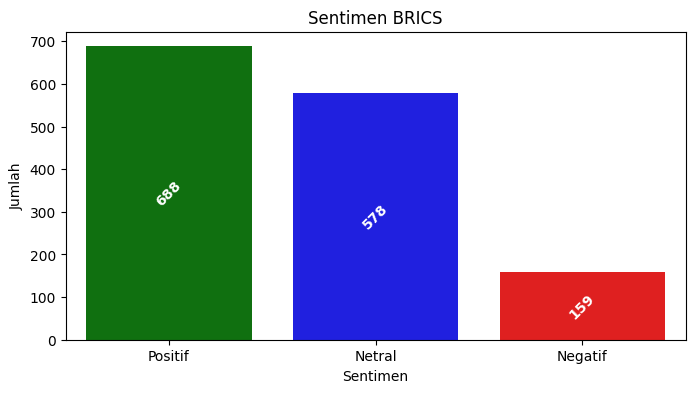

In [22]:
jumlah_sentimen = data['sentimen'].value_counts()

colors = {
    'Positif' : 'green',
    'Negatif' : 'red',
    'Netral'  : 'blue'
}

plt.figure(figsize=(8, 4))
bars = sns.barplot(
    x=jumlah_sentimen.index,
    y=jumlah_sentimen.values,
    palette=[colors[label] for label in jumlah_sentimen.index]
)

for bar, count in zip(bars.patches, jumlah_sentimen.values):
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        bar.get_height() / 2,
        f'{count}',
        ha='center', va='center', color='white', fontweight='bold', rotation=45
    )

plt.title("Sentimen BRICS")
plt.xlabel("Sentimen")
plt.ylabel("Jumlah")
plt.show()

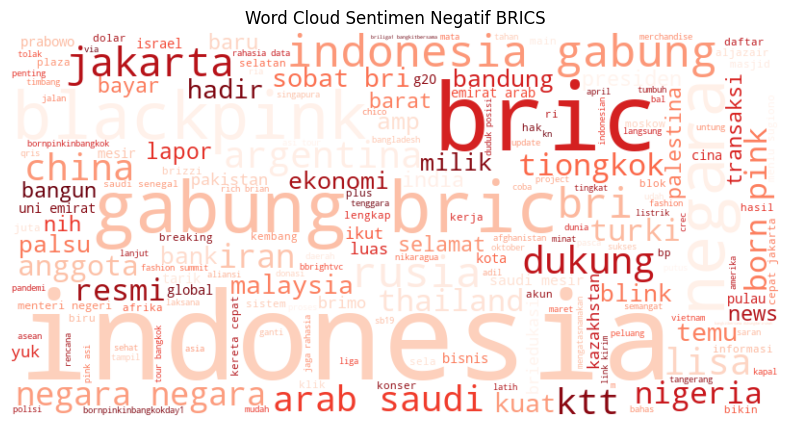

In [26]:
from wordcloud import WordCloud

sentimen_negatif = data[data['sentimen'] == 'Negatif']['stemming_text']

sentimen_negatif = ' '.join(sentimen_negatif)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Reds').generate(sentimen_negatif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Negatif BRICS")

plt.show()


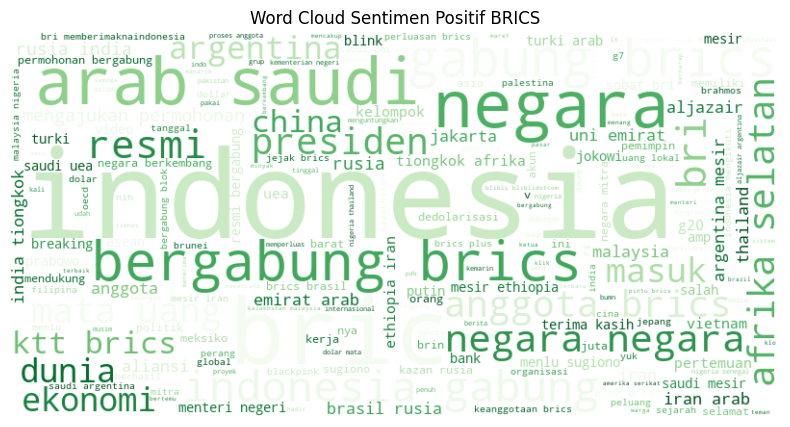

In [24]:
sentimen_positif = data[data['sentimen'] == 'Positif']['stopwords_text']

sentimen_positif = ' '.join(sentimen_positif)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Greens').generate(sentimen_positif)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif BRICS")

plt.show()

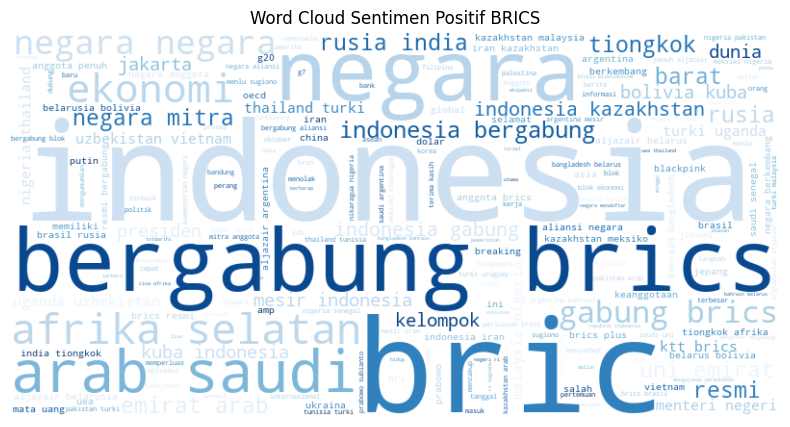

In [25]:
sentimen_netral = data[data['sentimen'] == 'Netral']['stopwords_text']

sentimen_netral = ' '.join(sentimen_netral)

wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='Blues').generate(sentimen_netral)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud Sentimen Positif BRICS")

plt.show()

In [27]:
data.to_csv("dataset sentimen/brics_processing.csv", index=False)